# Business goal

- In this project, we will build a text classification model on song lyrics. The task is to predict the artist from a piece of text.

# Importing libraries

In [1]:
#importing base librarires

import numpy as np
import pandas as pd
import requests
import re
import pprint
from bs4 import BeautifulSoup
import urllib.parse
import os
import matplotlib.pyplot as plt

# Scraping song lyrics

## URLs of artists

In [ ]:
# Urls of artists

URL_artist=['https://www.lyrics.com/artist/Avril-Lavigne/529805', 
            'https://www.lyrics.com/artist/Eminem/347307',
            'https://www.lyrics.com/artist/Bon-Jovi/3734',
            'https://www.lyrics.com/artist/Adele/861756'
           ]

## Extract URLs of lyrics

In [2]:
def extract_url(URL):
   
    '''This function extracts the artist's url and create a lyric url list'''
    
    #extract the artist URL and get the lyric URLs
    
    header={'User-Agent':
        'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36'}
        lyric_page=requests.get(url=URL, headers=header)
     
    pattern='/lyric/[^"]+'
    songs_lyric = re.findall(pattern, lyric_page.text , re.IGNORECASE)
    
    #create the lyric URL list for each artist
    
    lyrics_homepage='https://www.lyrics.com/'
    songs_lyric_url_list = []

    for song in songs_lyric:
        complete_url = lyrics_homepage + song
        songs_lyric_url_list.append(complete_url)
        
    return songs_lyric_url_list


In [3]:
#avril_songs_lyric_url_list=extract_url('https://www.lyrics.com/artist/Avril-Lavigne/529805')
#eminem_songs_lyric_url_list=extract_url('https://www.lyrics.com/artist/Eminem/347307')
#bon_jovi_songs_lyric_url_list=extract_url('https://www.lyrics.com/artist/Bon-Jovi/3734')
#adele_songs_lyric_url_list=extract_url('https://www.lyrics.com/artist/Adele/861756')

## Parsing HTML, downloading each lyrics as a text file in a diffirent folder

In [4]:
def create_lyric_text_file(list, artist):
    
    '''The function creates an artist folder and a text file including song lyrics in the folder'''
    
    #create an artist folder
    
    if not os.path.exists(artist):
        os.makedirs(artist)
    
    #apply BeautifulSoap
    
    for i in list:
        response = requests.get(url=i)
        lyric = response.text
        soup_lyric = BeautifulSoup(lyric,'html.parser')
        
    #find the lyric text from the html and also define the song name
    
        if soup_lyric.find(name='pre', class_='lyric-body')==None: 
            continue
        else:
            lyric_text = soup_lyric.find(name='pre', class_='lyric-body').get_text()
            
        j = i.find(artist) + len(artist) + 1
        song_name=urllib.parse.unquote_plus(i[j:]).replace('?', '').replace('[*]', '')
        
    #save the lyrics with the song name as a text file in the artist folder
    
        with open(file='./' + artist + '/' + song_name + '.txt', mode='w',encoding='utf-8') as f:
            f.write(lyric_text)
            f.close()

In [5]:
#create_lyric_text_file(avril_songs_lyric_url_list, 'Avril+Lavigne')
#create_lyric_text_file(eminem_songs_lyric_url_list, 'Eminem')
#create_lyric_text_file(bon_jovi_songs_lyric_url_list, 'Bon+Jovi')
#create_lyric_text_file(adele_songs_lyric_url_list, 'Adele')

# Preprosessing and cleaning the lyric corpus

In [6]:
def get_lyric(folder_name):
    
    '''The function reads song lyrics from the regarding folder and create a corpus by adding unique lyrics'''
    
    lyric_corpus = []
    
    for file_name in os.listdir(folder_name):
        
        with open(file = f'./{folder_name}/{file_name}', mode='r',encoding='utf-8' ) as f:
            text=f.read()
            
            # prevent to add more than one to the list
            
            if text not in lyric_corpus:
                lyric_corpus.append(text) 
                
            f.close()
            
    return lyric_corpus

In [7]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [8]:
def clean_list(list):
    
    list=[i.replace('\n',' ').replace('?', '').replace('!', '').replace("'", '').replace("  ", ' ').replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace(',', '').replace('.', '').replace('[*]', '').replace('じよう','').replace('つだけ','').replace('りまないなどない', '').lower() for i in list]

    pattern_1 = '[0-9]'
    list = [re.sub(pattern_1, '', i) for i in list]
  

    pattern_2='[\u4e00-\u9fff]+'
    list = [re.sub(pattern_2, '', i) for i in list]
    return list

In [9]:
def clean_text(lyric_list):

    '''Text function preprocesses and cleans the text in the corpus '''
    
    new_lyric_list=[]
    for text in lyric_list:
       
        # Convert words to lower case
        text = text.lower()
    
        # Expand contractions
        if True:
            text = text.split()
            new_text = []
            for word in text:
                if word in contractions:
                    new_text.append(contractions[word])
                else:
                    new_text.append(word)
            text = " ".join(new_text)
    
        # Format words and remove unwanted characters
        
        text.replace('\n',' ').replace('?', '').replace('!', '').replace("'", '')
        text.replace("  ", ' ').replace('(', '').replace(')', '').replace('[', '')
        text.replace(']', '').replace(',', '').replace('.', '').replace('[*]', '')
        text.replace('じよう','').replace('つだけ','').replace('りまないなどない', '')
        text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        text = re.sub(r'\<a href', ' ', text)
        text = re.sub(r'&amp;', '', text) 
        text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
        text = re.sub(r'<br />', ' ', text)
        text = re.sub(r'\'', ' ', text)
        text = re.sub('[0-9]', '', text)
        text = re.sub('[\u4e00-\u9fff]+', '', text)

        # remove short words less than 4 letters
        
        if True:
            text = text.split()
            new_text = []
            for word in text:
                if len(word)>3:
                    new_text.append(word)
                else:
                    new_text.append('')
            text = " ".join(new_text)
            
        
        new_lyric_list.append(text)
        
    return new_lyric_list

# Transforming text data into machine-readable numbers

## Bag of Words

### Vectorizing word counts

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
avril_corpus=get_lyric('Avril+Lavigne')
len(avril_corpus)

142

In [12]:
bon_jovi_corpus=get_lyric('Bon+Jovi')
len(bon_jovi_corpus)

425

In [13]:
corpus=avril_corpus+bon_jovi_corpus

In [14]:
len(corpus)

567

In [15]:
corpus

["He was working at the record shop\nI would kiss him in the parking lot\nTasting like cigarettes and soda pop\nSeventeen\nHe would tell me I was beautiful\nSneaking in the neighbor's swimming pool\nYeah, he taught me how to break the rules\nSeventeen\n\nHey, those days are long gone\nAnd when I hear this song it takes me back\n\nWe were on top of the world\nBack when I was your girl\nWe were living so wild and free\nActing stupid for fun\nAll we needed was love\nThat's the way it's supposed to be\nSeventeen\n\nStealing beers out of the trailer park\nFlicking lighters just to fight the dark\nMy favorite place was sitting in his car\nSeventeen\nWe laid a blanket on the roof top\nThat time I knew I wouldn't make him stop\nThe nights were cold but we kept 'em hot\nSeventeen\n\nHey, those days are long gone\nAnd when I hear this song it takes me back\n\nWe were on top of the world,\nBack when I was your girl\nWe were living so wild and free\nActing stupid for fun\nAll we needed was love\nT

In [16]:
corpus_clean=clean_text(corpus)

In [162]:
corpus_clean

['  working   record shop  would kiss    parking  tasting like cigarettes  soda  seventeen  would tell    beautiful sneaking   neighbor  swimming pool yeah  taught    break  rules seventeen  those days  long gone  when  hear this song  takes  back  were     world back when   your girl  were living  wild  free acting stupid     needed  love that  that        supposed   seventeen stealing beers    trailer park flicking lighters just  fight  dark  favorite place  sitting    seventeen  laid  blanket   roof  that time  knew  would  make  stop  nights were cold   kept   seventeen  those days  long gone  when  hear this song  takes  back  were     world back when   your girl  were living  wild  free acting stupid     needed  love that  that        supposed    were running  lights  were going  night   care about anything  were living  dream        were seventeen     seventeen seventeen  remember what  felt like just  small town kind  life   could only just  back  time seventeen  were     world

In [163]:
len(corpus_clean)

567

In [164]:
vectorizer=CountVectorizer(stop_words='english')

In [165]:
matrix_lyric_words=vectorizer.fit_transform(corpus_clean)

In [166]:
matrix_lyric_words

<567x4063 sparse matrix of type '<class 'numpy.int64'>'
	with 28542 stored elements in Compressed Sparse Row format>

In [167]:
matrix_lyric_words.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [168]:
vectorizer.get_feature_names()

['abel',
 'abend',
 'able',
 'absolution',
 'absorbent',
 'absurd',
 'abused',
 'acabar',
 'accent',
 'accessory',
 'accident',
 'accidental',
 'accused',
 'ache',
 'aches',
 'aching',
 'acted',
 'acting',
 'action',
 'actress',
 'actually',
 'adam',
 'addicted',
 'addiction',
 'addictive',
 'adieu',
 'adios',
 'admit',
 'admitted',
 'advice',
 'aeroplane',
 'affection',
 'afraid',
 'afternoon',
 'ahead',
 'ahhh',
 'aide',
 'aids',
 'ain',
 'airplane',
 'aisle',
 'alabama',
 'alarm',
 'alejo',
 'alibis',
 'alive',
 'allah',
 'alleys',
 'allnow',
 'allowed',
 'alls',
 'alright',
 'altar',
 'amado',
 'amanecer',
 'amante',
 'amazed',
 'amazing',
 'amber',
 'ambulance',
 'amen',
 'amens',
 'america',
 'american',
 'amor',
 'amphetamine',
 'amused',
 'amusing',
 'ana',
 'anaesthesia',
 'anarchy',
 'anesthesia',
 'angel',
 'angels',
 'anger',
 'anguish',
 'announcement',
 'answer',
 'answers',
 'anticipation',
 'anybody',
 'anymore',
 'anytime',
 'apart',
 'apologies',
 'apologize',
 'apolo

In [169]:
vectorizer.vocabulary_

{'working': 4014,
 'record': 2750,
 'shop': 3095,
 'kiss': 1881,
 'parking': 2447,
 'tasting': 3556,
 'like': 1994,
 'cigarettes': 631,
 'soda': 3254,
 'seventeen': 3050,
 'tell': 3577,
 'beautiful': 207,
 'sneaking': 3243,
 'neighbor': 2306,
 'swimming': 3516,
 'pool': 2578,
 'yeah': 4043,
 'taught': 3561,
 'break': 376,
 'rules': 2892,
 'days': 882,
 'long': 2039,
 'gone': 1454,
 'hear': 1617,
 'song': 3275,
 'takes': 3537,
 'world': 4017,
 'girl': 1426,
 'living': 2020,
 'wild': 3960,
 'free': 1356,
 'acting': 17,
 'stupid': 3449,
 'needed': 2301,
 'love': 2063,
 'supposed': 3488,
 'stealing': 3371,
 'beers': 216,
 'trailer': 3693,
 'park': 2445,
 'flicking': 1297,
 'lighters': 1990,
 'just': 1845,
 'fight': 1249,
 'dark': 865,
 'favorite': 1225,
 'place': 2535,
 'sitting': 3171,
 'laid': 1913,
 'blanket': 281,
 'roof': 2869,
 'time': 3639,
 'knew': 1891,
 'make': 2100,
 'stop': 3400,
 'nights': 2326,
 'cold': 686,
 'kept': 1856,
 'running': 2901,
 'lights': 1992,
 'going': 1452,
 '

In [170]:
df = pd.DataFrame(matrix_lyric_words.todense(), columns=vectorizer.get_feature_names())

In [171]:
df

,abel,abend,able,absolution,absorbent,absurd,abused,acabar,accent,accessory,...,yonder,york,youbut,young,younger,youth,ziggy,zillion,zone,りまないなどない
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalisation using TF-IDF

In [172]:
from sklearn.feature_extraction.text import TfidfTransformer

In [173]:
tf = TfidfTransformer()

In [174]:
tf_lyric_words = tf.fit_transform(matrix_lyric_words)
tf_lyric_words.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [175]:
tfdf = pd.DataFrame(tf_lyric_words.todense(), columns=vectorizer.get_feature_names())
tfdf

,abel,abend,able,absolution,absorbent,absurd,abused,acabar,accent,accessory,...,yonder,york,youbut,young,younger,youth,ziggy,zillion,zone,りまないなどない
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Logistic Regression

## Building the model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Using Vektorizer Matrix

In [32]:
#'Avril Lavigne' = '0'
#'Bon Jovi'      = '1'

X_v = df.values
y = ['Avril Lavigne'] * len(avril_corpus) + ['Bon Jovi'] * len(bon_jovi_corpus)

In [33]:
y

['Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril Lavigne',
 'Avril La

In [34]:
X_train_v, X_test_v, y_train, y_test = train_test_split(X_v,y)

In [35]:
m_log = LogisticRegression()
m_log.fit(X_train_v, y_train)

LogisticRegression()

In [36]:
m_log.score(X_train_v, y_train)

1.0

In [37]:
m_log.score(X_test_v,y_test)

0.8802816901408451

In [38]:
m_log.predict_proba(X_train_v)

array([[4.95238112e-03, 9.95047619e-01],
       [3.40951984e-03, 9.96590480e-01],
       [1.43791814e-03, 9.98562082e-01],
       [2.01287441e-03, 9.97987126e-01],
       [1.92609169e-02, 9.80739083e-01],
       [1.07135663e-03, 9.98928643e-01],
       [3.04138423e-03, 9.96958616e-01],
       [4.32230257e-03, 9.95677697e-01],
       [4.30058338e-03, 9.95699417e-01],
       [5.58347413e-03, 9.94416526e-01],
       [6.16428410e-03, 9.93835716e-01],
       [9.90553589e-01, 9.44641128e-03],
       [4.98094960e-03, 9.95019050e-01],
       [1.23997342e-08, 9.99999988e-01],
       [1.46136715e-02, 9.85386328e-01],
       [9.65916390e-01, 3.40836103e-02],
       [4.56201596e-03, 9.95437984e-01],
       [9.33816347e-03, 9.90661837e-01],
       [5.71877579e-03, 9.94281224e-01],
       [1.01889746e-03, 9.98981103e-01],
       [1.06501598e-02, 9.89349840e-01],
       [9.76641142e-01, 2.33588579e-02],
       [2.38176619e-03, 9.97618234e-01],
       [7.05432204e-03, 9.92945678e-01],
       [1.922260

### Using TF Matrix

In [39]:
X_tf = tfdf.values
y = ['Avril Lavigne'] * len(avril_corpus) + ['Bon Jovi'] * len(bon_jovi_corpus)

In [40]:
X_train_tf, X_test_tf, y_train, y_test = train_test_split(X_tf,y)

In [41]:
m_log.fit(X_train_tf, y_train)

LogisticRegression()

In [96]:
round(m_log.score(X_train_tf,y_train),3)

0.934

In [97]:
round(m_log.score(X_test_tf,y_test),3)

0.852

In [44]:
m_log.predict_proba(X_train_tf)

array([[0.24801048, 0.75198952],
       [0.36539669, 0.63460331],
       [0.16516452, 0.83483548],
       [0.55917422, 0.44082578],
       [0.48313088, 0.51686912],
       [0.1650757 , 0.8349243 ],
       [0.16402672, 0.83597328],
       [0.55583547, 0.44416453],
       [0.38167694, 0.61832306],
       [0.16295686, 0.83704314],
       [0.17033422, 0.82966578],
       [0.16770342, 0.83229658],
       [0.11082603, 0.88917397],
       [0.54975888, 0.45024112],
       [0.10118435, 0.89881565],
       [0.169864  , 0.830136  ],
       [0.17713668, 0.82286332],
       [0.12787371, 0.87212629],
       [0.17336466, 0.82663534],
       [0.49072807, 0.50927193],
       [0.55583547, 0.44416453],
       [0.13226193, 0.86773807],
       [0.20400729, 0.79599271],
       [0.10856177, 0.89143823],
       [0.24350599, 0.75649401],
       [0.1352068 , 0.8647932 ],
       [0.37142515, 0.62857485],
       [0.15779111, 0.84220889],
       [0.14275563, 0.85724437],
       [0.1552742 , 0.8447258 ],
       [0.

In [45]:
m_log.predict_proba(X_test_tf)

array([[0.13996207, 0.86003793],
       [0.32765796, 0.67234204],
       [0.14751713, 0.85248287],
       [0.26447805, 0.73552195],
       [0.27325744, 0.72674256],
       [0.19652395, 0.80347605],
       [0.17633237, 0.82366763],
       [0.47635861, 0.52364139],
       [0.14904116, 0.85095884],
       [0.24996435, 0.75003565],
       [0.1870158 , 0.8129842 ],
       [0.14530559, 0.85469441],
       [0.16594718, 0.83405282],
       [0.61407685, 0.38592315],
       [0.23950716, 0.76049284],
       [0.18797644, 0.81202356],
       [0.14434408, 0.85565592],
       [0.48313088, 0.51686912],
       [0.46193912, 0.53806088],
       [0.21721645, 0.78278355],
       [0.20942562, 0.79057438],
       [0.15140539, 0.84859461],
       [0.49217795, 0.50782205],
       [0.17490105, 0.82509895],
       [0.20584022, 0.79415978],
       [0.22762823, 0.77237177],
       [0.25951953, 0.74048047],
       [0.16484358, 0.83515642],
       [0.16326117, 0.83673883],
       [0.20516195, 0.79483805],
       [0.

## Making a prediction for a new song lyric

In [46]:
new_lyric=['golden bridge sunset corner store children explore the dealers roam like angels with no halos I dont know anything anymore']

In [47]:
new_lyric_clean=clean_list(new_lyric)

In [48]:
count = vectorizer.transform(new_lyric_clean)
count

<1x4063 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [49]:
count.todense()

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
tfcounts = tf.transform(count)

In [51]:
m_log.predict(tfcounts)

array(['Bon Jovi'], dtype='<U13')

In [52]:
m_log.predict_proba(tfcounts)

array([[0.24323497, 0.75676503]])

# Naive Bayes

In [53]:
from sklearn.naive_bayes import MultinomialNB

In [176]:
m_nb = MultinomialNB(alpha=0.3)
m_nb.fit(X_train_v, y_train)


MultinomialNB(alpha=0.3)

In [178]:
round(m_nb.score(X_train_v, y_train),3)

0.913

In [181]:
round(m_nb.score(X_test_v, y_test),3)

0.662

In [55]:
m_nb.predict_proba(X_train_v)

array([[8.11500979e-048, 1.00000000e+000],
       [1.00000000e+000, 1.57389945e-031],
       [8.90704964e-043, 1.00000000e+000],
       [9.98994143e-001, 1.00585715e-003],
       [9.99999998e-001, 2.33163119e-009],
       [8.10532890e-019, 1.00000000e+000],
       [7.71899418e-027, 1.00000000e+000],
       [1.00000000e+000, 1.23206016e-030],
       [1.00000000e+000, 9.31173174e-030],
       [2.28307658e-026, 1.00000000e+000],
       [1.84859065e-019, 1.00000000e+000],
       [2.68470355e-011, 1.00000000e+000],
       [2.79647224e-013, 1.00000000e+000],
       [1.00000000e+000, 8.06415589e-012],
       [3.69342389e-008, 9.99999963e-001],
       [1.01088525e-007, 9.99999899e-001],
       [2.54089035e-021, 1.00000000e+000],
       [3.49815409e-015, 1.00000000e+000],
       [2.23163867e-015, 1.00000000e+000],
       [1.00000000e+000, 1.30572836e-011],
       [1.00000000e+000, 7.33477910e-035],
       [9.99498618e-001, 5.01382285e-004],
       [4.20348279e-015, 1.00000000e+000],
       [1.5

In [179]:
m_nb.fit(X_train_tf, y_train)

MultinomialNB(alpha=0.3)

In [180]:
round(m_nb.score(X_train_tf, y_train),3)

0.929

In [182]:
round(m_nb.score(X_test_tf, y_test),3)

0.859

# Model evaluation metrics

In [59]:
#for i in range(0, len(ypred)):
    #if ypred[i]=='Avril Lavigne': ypred[i]=0
    #if ypred[i]=='Bon Jovi': ypred[i]=1
            

In [60]:
#for i in range(0, len(y_test)):
    #if y_test[i]=='Avril Lavigne': y_test[i]=0
    #if y_test[i]=='Bon Jovi': y_test[i]=1

In [61]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

## Logistic Regression

### Confusion matrix

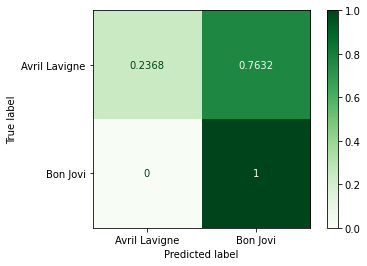

In [62]:
metrics.plot_confusion_matrix(m_log, X_test_tf, y_test,
                              normalize='true',
                              values_format=".4g", 
                              cmap='Greens'
                             );

In [63]:
y_pred_log_reg=m_log.predict(X_train_tf)

In [64]:
len(y_pred_log_reg)

425

In [65]:
len(y_train)

425

### Accuracy, precision, recall & f_1 scores

In [66]:
#The percentage of correct guesses
print ('The accuracy_score: %.2f'
      % accuracy_score(y_train,y_pred_log_reg))

#Percentage of positive classified observations that are positive
print ('The precision score: %.2f'
      % precision_score(y_train,y_pred_log_reg,average="binary",pos_label='Bon Jovi'))

#Percentage of positive observations correctly classified as positive
print('The recall score: %.2f'
      % recall_score(y_train,y_pred_log_reg,average="binary",pos_label='Bon Jovi'))

#(Harmonic) average of precision and recall
print('The f_1 score: %.2f'
      % f1_score(y_train,y_pred_log_reg,average="binary",pos_label='Bon Jovi'))

The accuracy_score: 0.87
The precision score: 0.85
The recall score: 1.00
The f_1 score: 0.92


## Naive Bayes

### Confusion matrix

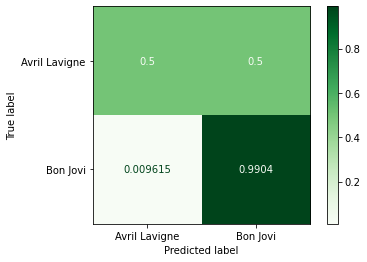

In [67]:
metrics.plot_confusion_matrix(m_nb, X_test_tf, y_test,
                              normalize='true',
                              values_format=".4g", 
                              cmap='Greens'
                             );

### Accuracy, precision, recall & f_1 scores

In [68]:
y_pred_nb=m_nb.predict(X_train_tf)

In [69]:
#The percentage of correct guesses
print ('The accuracy_score: %.2f'
      % accuracy_score(y_train,y_pred_nb))

#Percentage of positive classified observations that are positive
print ('The precision score: %.2f'
      % precision_score(y_train,y_pred_nb,average="binary",pos_label='Bon Jovi'))

#Percentage of positive observations correctly classified as positive
print('The recall score: %.2f'
      % recall_score(y_train,y_pred_nb,average="binary",pos_label='Bon Jovi'))

#(Harmonic) average of precision and recall
print('The f_1 score: %.2f'
      % f1_score(y_train,y_pred_nb,average="binary",pos_label='Bon Jovi'))

The accuracy_score: 0.93
The precision score: 0.91
The recall score: 1.00
The f_1 score: 0.96


# Stemming & Lemmatization

In [70]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [71]:
#nltk.download()

In [72]:
def stemming_list(list):
    porter = PorterStemmer()
    
    for sentence in list:
        token_words=word_tokenize(sentence)
        
        stem_sentence=[]
        
        for word in token_words:
            stem_sentence.append(porter.stem(word))
            stem_sentence.append(" ")
            
    return "".join(stem_sentence)   
        

In [73]:
#stemming_list(corpus_clean)

# Class Imbalance

In [74]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

In [75]:
def print_evaluations(ytrue, ypred, model,pos):
    
    """
    Function that compares several scores for a given model
    """
    
    print(f'How does model {model} score:')
    print(f'The accuracy of the model is: {round(metrics.accuracy_score(ytrue, ypred), 4)}')
    print(f'The precision of the model is: {round(metrics.precision_score(ytrue, ypred, pos_label=pos), 4)}')
    print(f'The recall of the model is: {round(metrics.recall_score(ytrue, ypred, pos_label=pos), 4)}')
    print(f'The f1-score of the model is: {round(metrics.f1_score(ytrue, ypred, pos_label=pos), 4)}')
    
    return metrics.precision_score(ytrue, ypred, pos_label=pos), metrics.recall_score(ytrue, ypred,pos_label=pos), metrics.f1_score(ytrue, ypred,pos_label=pos)

In [76]:
def print_class_proportion(ytrain,yresampled,method):
    print(f'''Class proportion (original):\n{len(ytrain)}\n''')
    print(f'''unique samples in each class ({method}):\n{len(yresampled)}''')

## Random undersampling

- Selects a subsample from the majority class randomly.

In [119]:
under_sampler = RandomUnderSampler(sampling_strategy={'Bon Jovi':120},
                        random_state=10,
                        replacement=False)

In [120]:
X_uresampled, y_uresampled = under_sampler.fit_resample(X_train_tf, y_train)

In [121]:
print_class_proportion(ytrain=y_train, yresampled=y_uresampled, method="RandomUnderSampling")

Class proportion (original):
425

unique samples in each class (RandomUnderSampling):
224


In [122]:
m_log.fit(X_uresampled,y_uresampled)
ypred_un = m_log.predict(X_test_tf)

In [123]:
precision_under, recall_under, f1_under = print_evaluations(y_test,ypred_un,'Logistic regression', 'Bon Jovi')

How does model Logistic regression score:
The accuracy of the model is: 0.8944
The precision of the model is: 0.9009
The recall of the model is: 0.9615
The f1-score of the model is: 0.9302


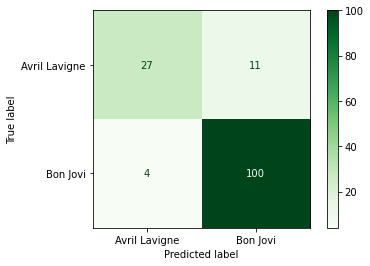

In [124]:
metrics.plot_confusion_matrix(m_log, X_test_tf, y_test,
                              #normalize='true',
                              values_format=".4g", 
                              cmap='Greens'
                             );

## Random oversampling

- Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.
(bootstrap with replacement)

In [129]:
over_sampler = RandomOverSampler(random_state=10, sampling_strategy={'Avril Lavigne':300})

In [130]:
pipeline = make_pipeline(over_sampler,LogisticRegression(max_iter=1000))

In [131]:
pipeline.fit(X_train_tf,y_train)
ypred_over = pipeline.predict(X_test_tf)

In [132]:
precision_over, recall_over, f1_over = print_evaluations(y_test,ypred_over,'Logistic regression', 'Bon Jovi')

How does model Logistic regression score:
The accuracy of the model is: 0.9085
The precision of the model is: 0.9099
The recall of the model is: 0.9712
The f1-score of the model is: 0.9395


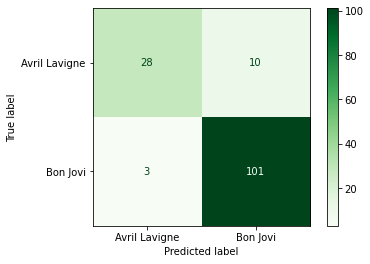

In [133]:
metrics.plot_confusion_matrix(pipeline, X_test_tf, y_test,
                              #normalize='true',
                              values_format=".4g", 
                              cmap='Greens'
                             );

## Synthetic Minority Over Sampling (SMOTE)

- Random factor times the distance to one of the Nearest Neighbours is used to generate new data point. The below demonstrates how SMOTE is done.

In [144]:
smote_sampler = SMOTE(random_state=10,
                      sampling_strategy={'Avril Lavigne':300},
                     k_neighbors=5)

In [145]:
smote_pipeline = make_pipeline(smote_sampler,LogisticRegression(max_iter=1000))
smote_pipeline.fit(X_train_tf,y_train)
ypred_smote=smote_pipeline.predict(X_test_tf)

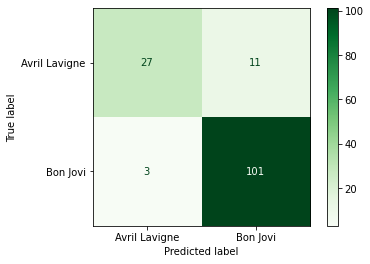

In [147]:
metrics.plot_confusion_matrix(smote_pipeline, X_test_tf, y_test,
                              #normalize='true',
                              values_format=".5g", 
                              cmap='Greens'
                             );

# Word Cloud

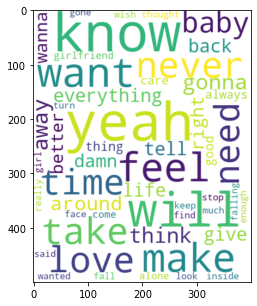

In [156]:
import wordcloud

mask = np.zeros((500, 400, 3), np.uint8)
mask[100:150,200:175,:] = 255  # masked out area

cloud = wordcloud.WordCloud(background_color="white",
                max_words=50,
                mask=mask,
                collocations=False,  # calculates frequencies
                contour_color='steelblue').generate(str(clean_text(avril_corpus)))
                # stop words are removed!

plt.figure(figsize = (10,5))
plt.imshow(cloud, interpolation='bilinear')
#plt.savefig('cloud.png')
plt.show()